In [1]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:20,.2f}'.format

def print(*args):
    __builtins__.print(*("%.2f" % a if isinstance(a, float) else a
                         for a in args))


In [2]:
data = load_boston()

#Use NO standardize data. Not a good idea
#X = data.data

#Use standardize data
X = StandardScaler(with_mean=True,with_std=True).fit_transform(data.data)


In [3]:
#Set number of components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

#Show variance and % and amount of variance explained
print("Variance Ratio: ", pca.explained_variance_ratio_)
print("Variance Ratio Explained",pca.explained_variance_ratio_.sum())

Variance Ratio:  [0.47129606 0.11025193 0.0955859 ]
Variance Ratio Explained 0.68


In [4]:
#train using use PCA values
X_train, X_test, y_train, y_test = train_test_split(X_pca, data.target, test_size=0.2, random_state=0)

#train using all original values
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Score: ", regressor.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score:  0.69
Mean Absolute Error: 4.75
Mean Squared Error: 49.20
Root Mean Squared Error: 7.01


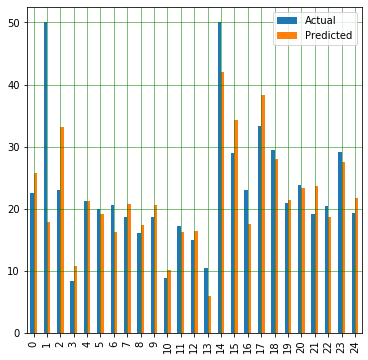

In [5]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

df.head()
df1 = df.head(25)
df1.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()